#Assignment 1
##DSC 478 - Programming ML Apps
##Alex Teboul

## Bank.csv Dataset Background
The marketing department of a financial firm keeps records on customers, including demographic information and, number of type of accounts. When launching a new product, such as a "Personal Equity Plan" (PEP), a direct mail piece or a targeted email, advertising the product, is sent to existing customers, and a record kept as to whether that customer responded and bought the product. Based on this database of prior cases, the managers decide to use data mining techniques to build customer profile models in order to predict the behavior of future customers.

The data is contained in the file bank_data.csv. Each record is a customer description where the "pep" field indicates whether or not that customer has purchased a PEP. For classification problems, this field is used as the target attribute (with "YES" and "NO") as class labels.

## Imports and Getting the Data

In [0]:
#Imports
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [3]:
#Mounts the Google Drive so I can pull the bank_data.csv file from my drive. Like setting working directory.
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
file_path = '/content/drive/My Drive/DSC 478 - Programming ML Apps/bank_data.csv'

In [5]:
df = pd.read_csv(file_path)
df.head()

,id,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep
0,ID12101,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES
1,ID12102,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO
2,ID12103,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO
3,ID12104,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO
4,ID12105,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO


## Problem 1

1. Explore the general characteristics of the data as a whole: examine the means, standard deviations, and other statistics associated with the numerical attributes; show the distributions of values associated with categorical attributes; etc.

### Basic Checks

In [0]:
#We don't need that ID column for anything
df.drop('id', axis=1, inplace=True)


In [47]:
#Get shape of data to show how many rows and columns
df.shape

#Turns out we have 600 rows and 11 columns since we dropped 'id'

(600, 11)

In [48]:
#Confirm no missing values in dataset
df.isnull().sum()

age             0
income          0
children        0
gender          0
region          0
married         0
car             0
savings_acct    0
current_acct    0
mortgage        0
pep             0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8b1d295940>,
      dtype=object)

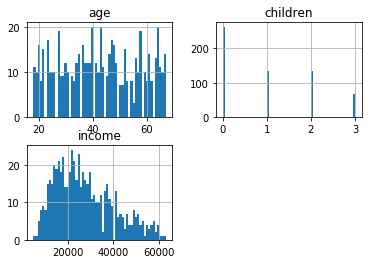

In [49]:
df.hist(bins=60)

### Numerical Value Stats

In [51]:
#Get the means, standard deviations and other key statistics associated with the numerical attributes
#Our numerical Attributes are Age, Income and Children
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,600.0,42.395000,14.424947,18.00,30.0,42.0,55.250,67.0
income,600.0,27524.031217,12899.468246,5014.21,17264.5,24925.3,36172.675,63130.1
children,600.0,1.011667,1.056752,0.00,0.0,1.0,2.000,3.0


### Categorical Attribute Distributions/Counts

MALE      300
FEMALE    300
Name: gender, dtype: int64

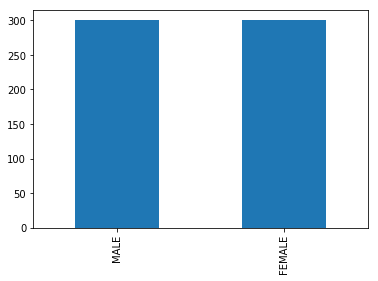

In [52]:
#Gender
df['gender'].value_counts().plot(kind='bar')
df['gender'].value_counts()



*   Appears we have an equal number of male and female in the datset. 300 of each.



INNER_CITY    269
TOWN          173
RURAL          96
SUBURBAN       62
Name: region, dtype: int64

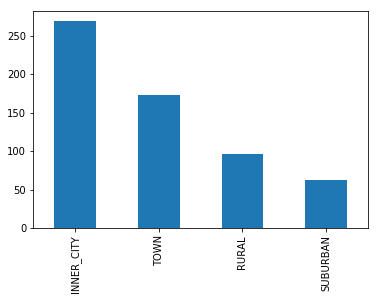

In [21]:
#Region
df['region'].value_counts().plot(kind='bar')
df['region'].value_counts()

* Most customers from the inner city in this dataset. Followed by Town, Rural, and Suburban with the lowest.

YES    396
NO     204
Name: married, dtype: int64

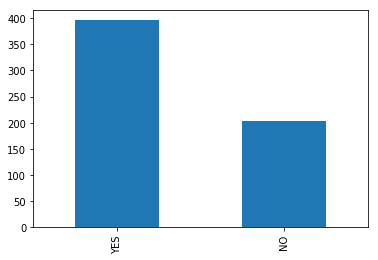

In [22]:
#Married
df['married'].value_counts().plot(kind='bar')
df['married'].value_counts()

* More yes than no in the dataset. Roughly double married vs not married.

NO     304
YES    296
Name: car, dtype: int64

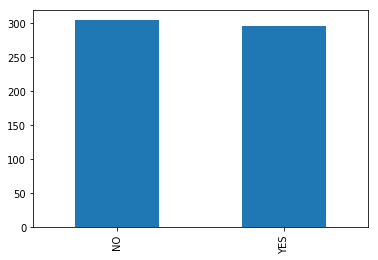

In [23]:
#Car
df['car'].value_counts().plot(kind='bar')
df['car'].value_counts()

* Roughly equal number of customers with and without a car.

YES    414
NO     186
Name: savings_acct, dtype: int64

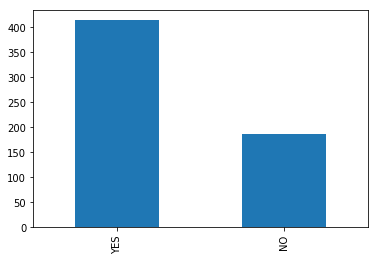

In [24]:
#Savings Account
df['savings_acct'].value_counts().plot(kind='bar')
df['savings_acct'].value_counts()

* Slightly more than double the number of customers with savings accounts vs those without.

YES    455
NO     145
Name: current_acct, dtype: int64

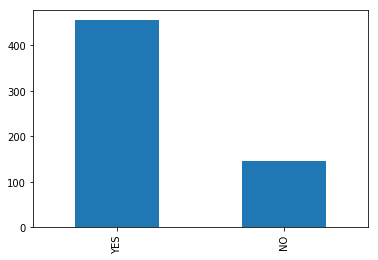

In [25]:
#Current Account
df['current_acct'].value_counts().plot(kind='bar')
df['current_acct'].value_counts()

* A bit more than triple the say yes to current account than no.

NO     391
YES    209
Name: mortgage, dtype: int64

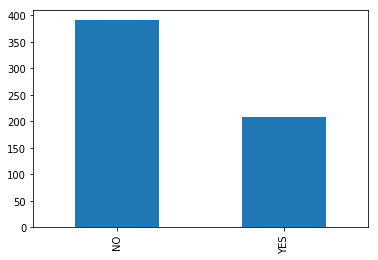

In [28]:
#Mortgage
df['mortgage'].value_counts().plot(kind='bar')
df['mortgage'].value_counts()

* Roughly double the customers without mortgages vs those with.

NO     326
YES    274
Name: pep, dtype: int64

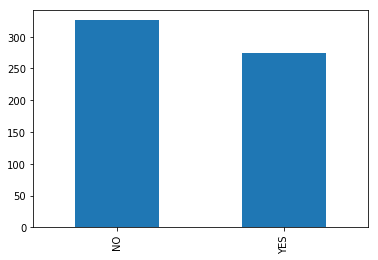

In [29]:
#PEP
df['pep'].value_counts().plot(kind='bar')
df['pep'].value_counts()

* There are 326 No to 274 Yes on customers who didn't buy vs bought PEP.

## Problem 2

2. Suppose that the hypothetical bank is particularly interested in customers who buy the PEP (Personal Equity Plan) product. Compare and contrast the subsets of customers who buy and don't buy the PEP. Compute summaries (as in part 1) of the selected data with respect to all other attributes. Can you observe any significant differences between these segments of customers? Discuss your observations.


### Create PEP subsets and Compute Summaries

In [0]:
#subset for YES pep
yes_pep = df[df['pep'] == "YES"]
#yes_pep.head()


In [0]:
#subset for NO pep
no_pep = df[df['pep'] == "NO"]
#no_pep.head()

In [0]:
#get a dummy df in case it's useful later on
df_dummy_pepcol = df['pep']
df_dummypre = df.drop('pep', axis=1)
df_dummypre2 = pd.get_dummies(df_dummypre)
df_dummy = df_dummypre2
df_dummy['pep'] = df_dummy_pepcol

#yes no dummy dfs
df_dummy_yespep = pd.get_dummies(yes_pep)
#df_dummy_yespep.head()
df_dummy_nopep = pd.get_dummies(no_pep)
#df_dummy_nopep

#df_dummy.head()

### Compare and Contrast PEP subsets

In [87]:
#Let's get the numerical summaries for YES_pep subset
yes_pep.describe().T

,count,mean,std,min,25%,50%,75%,max
age,274.0,45.127737,14.327991,18.00,34.000,45.00,58.00,67.0
income,274.0,30644.919453,13609.613043,7756.36,19639.475,28080.05,38458.35,63130.1
children,274.0,0.945255,0.860571,0.00,0.000,1.00,1.00,3.0


In [89]:
#Let's get the numerical summaries for NO_pep subset
no_pep.describe().T

,count,mean,std,min,25%,50%,75%,max
age,326.0,40.098160,14.123506,18.00,27.000,40.0,51.0,67.0
income,326.0,24900.953374,11661.123422,5014.21,15366.475,23105.0,31210.9,61554.6
children,326.0,1.067485,1.195524,0.00,0.000,0.0,2.0,3.0


* A couple of observations:
 * 274 YES vs. 326 NO
 * Mean Income and Mean Age are higher in the YES group
 * Income standard deviation is higher in YES group, as is the minimum value.


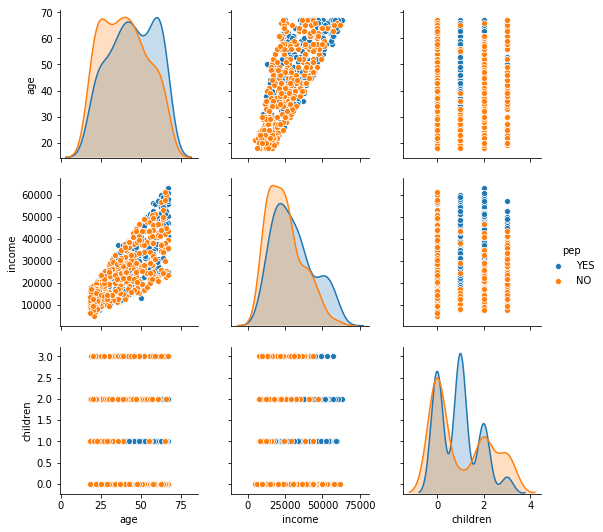

In [71]:
#visualize the difference
sns.pairplot(df, hue = 'pep')
#sns.pairplot(df_dummy, hue = 'pep')

* The yes_pep/no_pep subsets have similar distributions for the 3 numeric attributes. A bit of a difference in children distribution with 3 peaks for YES pep vs 2 for NO pep.

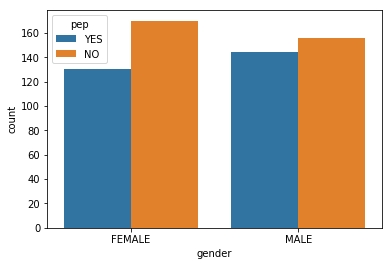

In [72]:
#Gender
gender_comp = sns.countplot(x="gender", hue="pep", data=df)

* Male about the same, but more NO's in the female group vs YES's.

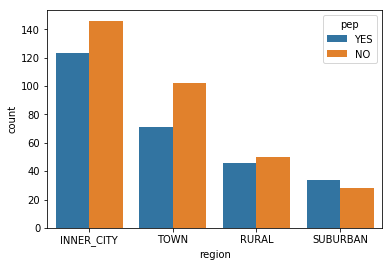

In [79]:
#Region
region_comp = sns.countplot(x="region", hue="pep", data=df)

* Seems like for Inner City, Town, and Rural there are more NO's than YES's for PEP. Suburban customers had slightly more YES's than NO's, but the overall population of the suburban group is also much lower.

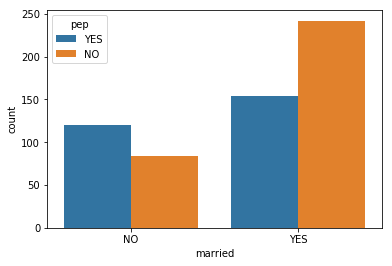

In [80]:
#Married
married_comp = sns.countplot(x="married", hue="pep", data=df)

* For married customers, more did not have PEP than those who did have PEP.
* For un-married customers, there were more YES than NO responses for PEP.
* Seems to be good split on / be a part of some form of classification.  

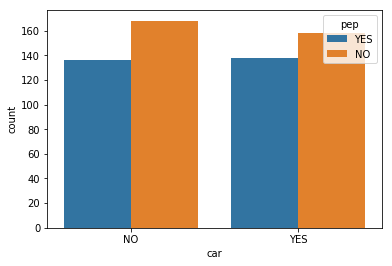

In [83]:
#Car
car_comp = sns.countplot(x="car", hue="pep", data=df)

* More NO PEP than YES PEP for both those who have and do not have cars.

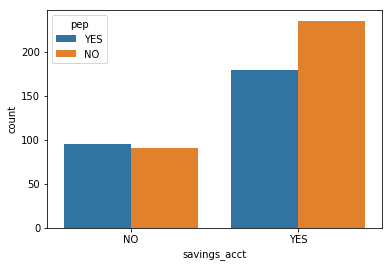

In [86]:
#Savings Accounts
savings_comp = sns.countplot(x="savings_acct", hue="pep", data=df)

* Savings_acct NO responses had about the same YES/NO to PEP
* For those with savings accounts, more did not have PEP than those who did.

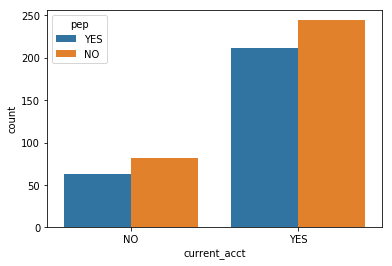

In [84]:
#Current Accounts
current_comp = sns.countplot(x="current_acct", hue="pep", data=df)

* For both those with current account and those without, more customers responded NO PEP than those who said YES PEP. 

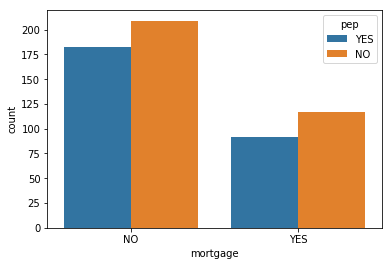

In [85]:
#Mortgage
mortage_comp = sns.countplot(x="mortgage", hue="pep", data=df)

* FOr both those with a mortgage and those without, more customers responded NO PEP than those who said YES PEP.

## Problem 3

3. Use z-score normalization to standardize the values of the income attribute. [Do not change the original income attribute in the table.]

### Z-Score Normalization

In [94]:
#Z-Score normalization of income attribute
df['income_Z'] = (df['income'] - df['income'].mean())/df['income'].std()
df.head()


,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,income_Z
0,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.773523
1,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198541
2,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.848766
3,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554180
4,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.787071


In [96]:
#Describe variables to double check
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,600.0,4.239500e+01,14.424947,18.000000,30.000000,42.00000,55.250000,67.000000
income,600.0,2.752403e+04,12899.468246,5014.210000,17264.500000,24925.30000,36172.675000,63130.100000
children,600.0,1.011667e+00,1.056752,0.000000,0.000000,1.00000,2.000000,3.000000
income_Z,600.0,-2.513545e-15,1.000000,-1.745019,-0.795345,-0.20146,0.670465,2.760274


## Problem 4

4. Discretize the age attribute into 3 categories (corresponding to "young", "mid-age", and "old"). [Do not change the original age attribute in the table.]

### Discretize Age

In [103]:
# Discretize age into 3 bins
#young = 0-30 (about 25% of samples)
#mid-age = 30-55 (about 50% of samples)
#old = 55-70 (about 25% of of samples)
age_bins = [0, 30, 55, 70]
age_labels = ["young","mid-age","old"]
age_discrete = pd.cut(df['age'],bins=age_bins, labels=age_labels)

df['age_discrete'] = age_discrete
df.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,income_Z,age_discrete
0,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.773523,mid-age
1,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198541,mid-age
2,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.848766,mid-age
3,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554180,young
4,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.787071,old


mid-age    294
young      156
old        150
Name: age_discrete, dtype: int64

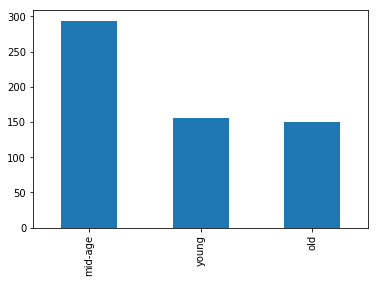

In [102]:
#Show distribution
df['age_discrete'].value_counts().plot(kind='bar')
df['age_discrete'].value_counts()

* I chose to split young / mid-age / old with 25% / 50% / 25% samples per group respectively, but other groupings could be more useful depending on the purpose. 

## Problem 5

5. Use Min-Max Normalization to transform the values of all numeric attributes  (income, age, children) in the original table (before the transformations in parts 3 and 4 above) onto the range 0.0-1.0.

### Min-Max on Income

In [113]:
# Income as float
income_float = df[['income']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
income_float_scaled = min_max_scaler.fit_transform(income_float)

# Run the normalizer on the dataframe
minmax_income = pd.DataFrame(income_float_scaled)

# Append to global df
df['minmax_income'] = minmax_income[0]

df.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,income_Z,age_discrete,minmax_income
0,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.773523,mid-age,0.215634
1,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198541,mid-age,0.431395
2,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.848766,mid-age,0.198933
3,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554180,young,0.264320
4,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.787071,old,0.783987


### Min-Max on Age

In [114]:
# Age as float
age_float = df[['age']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
age_float_scaled = min_max_scaler.fit_transform(age_float)

# Run the normalizer on the dataframe
minmax_age = pd.DataFrame(age_float_scaled)

# Append to global df
df['minmax_age'] = minmax_age[0]

df.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,income_Z,age_discrete,minmax_income,minmax_age
0,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.773523,mid-age,0.215634,0.612245
1,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198541,mid-age,0.431395,0.448980
2,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.848766,mid-age,0.198933,0.673469
3,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554180,young,0.264320,0.102041
4,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.787071,old,0.783987,0.795918


### Min-Max on Children

In [115]:
# Income as float
children_float = df[['children']].values.astype(float)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()

# Create an object to transform the data to fit minmax processor
children_float_scaled = min_max_scaler.fit_transform(children_float)

# Run the normalizer on the dataframe
minmax_children = pd.DataFrame(children_float_scaled)

# Append to global df
df['minmax_children'] = minmax_children[0]

df.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,income_Z,age_discrete,minmax_income,minmax_age,minmax_children
0,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.773523,mid-age,0.215634,0.612245,0.333333
1,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198541,mid-age,0.431395,0.448980,1.000000
2,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.848766,mid-age,0.198933,0.673469,0.000000
3,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554180,young,0.264320,0.102041,1.000000
4,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.787071,old,0.783987,0.795918,0.000000


### Check overall dataframe

In [116]:
df.head()

,age,income,children,gender,region,married,car,savings_acct,current_acct,mortgage,pep,income_Z,age_discrete,minmax_income,minmax_age,minmax_children
0,48,17546.0,1,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,YES,-0.773523,mid-age,0.215634,0.612245,0.333333
1,40,30085.1,3,MALE,TOWN,YES,YES,NO,YES,YES,NO,0.198541,mid-age,0.431395,0.448980,1.000000
2,51,16575.4,0,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,NO,-0.848766,mid-age,0.198933,0.673469,0.000000
3,23,20375.4,3,FEMALE,TOWN,YES,NO,NO,YES,NO,NO,-0.554180,young,0.264320,0.102041,1.000000
4,57,50576.3,0,FEMALE,RURAL,YES,NO,YES,NO,NO,NO,1.787071,old,0.783987,0.795918,0.000000


In [118]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,600.0,4.239500e+01,14.424947,18.000000,30.000000,42.000000,55.250000,67.000000
income,600.0,2.752403e+04,12899.468246,5014.210000,17264.500000,24925.300000,36172.675000,63130.100000
children,600.0,1.011667e+00,1.056752,0.000000,0.000000,1.000000,2.000000,3.000000
income_Z,600.0,-2.513545e-15,1.000000,-1.745019,-0.795345,-0.201460,0.670465,2.760274
minmax_income,600.0,3.873264e-01,0.221961,0.000000,0.210791,0.342610,0.536144,1.000000
minmax_age,600.0,4.978571e-01,0.294387,0.000000,0.244898,0.489796,0.760204,1.000000
minmax_children,600.0,3.372222e-01,0.352251,0.000000,0.000000,0.333333,0.666667,1.000000


* Everything Checks out in terms of the normalization. Not sure why we have done both z-score and minmax normalization on the income attribute though.

## Problem 6

6. Convert the table (after normalization in part 5) into the standard spreadsheet format. Note that this requires converting each categorical attribute into multiple binary ("dummy") attributes (one for each values of the categorical attribute) and assigning binary values corresponding to the presence or not presence of the attribute value in the original record). The numeric attributes should remain unchanged. Save this new table into a file called bank_numeric.csv and submit it along with your assignment. [Hint: you might consider using the get_dummies for Pandas data frames.]

### New Dataframe With Required Columns

In [123]:
# Make a new datframe for what I assume are the columns actually required.

df_p6 = df[['pep','gender','region','married','car','savings_acct','current_acct','mortgage','age_discrete','minmax_income','minmax_age','minmax_children','income_Z']]

df_p6.head()

,pep,gender,region,married,car,savings_acct,current_acct,mortgage,age_discrete,minmax_income,minmax_age,minmax_children,income_Z
0,YES,FEMALE,INNER_CITY,NO,NO,NO,NO,NO,mid-age,0.215634,0.612245,0.333333,-0.773523
1,NO,MALE,TOWN,YES,YES,NO,YES,YES,mid-age,0.431395,0.448980,1.000000,0.198541
2,NO,FEMALE,INNER_CITY,YES,YES,YES,YES,NO,mid-age,0.198933,0.673469,0.000000,-0.848766
3,NO,FEMALE,TOWN,YES,NO,NO,YES,NO,young,0.264320,0.102041,1.000000,-0.554180
4,NO,FEMALE,RURAL,YES,NO,YES,NO,NO,old,0.783987,0.795918,0.000000,1.787071


### Get Dummy Dataframe

In [124]:
#get a dummy df in case it's useful later on
df_p6_dummy = pd.get_dummies(df_p6)

df_p6_dummy.head()

,minmax_income,minmax_age,minmax_children,income_Z,pep_NO,pep_YES,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,age_discrete_young,age_discrete_mid-age,age_discrete_old
0,0.215634,0.612245,0.333333,-0.773523,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,1,0
1,0.431395,0.448980,1.000000,0.198541,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0
2,0.198933,0.673469,0.000000,-0.848766,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0
3,0.264320,0.102041,1.000000,-0.554180,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0
4,0.783987,0.795918,0.000000,1.787071,1,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1


* Instructions imply that both Z-Score income and min-max income belong here but it doesn't make sense to me to include both.

###Save Table to bank_numeric.csv

In [0]:
file_name = 'bank_numeric.csv'
df_p6_dummy.to_csv(file_name)#, sep='\t', encoding='utf-8')

## Problem 7

7. Using the standardized data set (of the previous part), perform basic correlation analysis among the attributes. Discuss your results by indicating any significant positive or negative correlations among pairs of attributes. You need to construct a complete Correlation Matrix. Be sure to first remove the Customer ID column before creating the correlation matrix. [Hint: you can create the correlation matrix by using the corr() function in Pandas, try at least two corr methods and compare them].


### Method1: Simple Correlation Matrix

In [127]:
#Simple Correlation Matrix
dummy_corr = df_p6_dummy.corr(method="pearson")
dummy_corr

,minmax_income,minmax_age,minmax_children,income_Z,pep_NO,pep_YES,gender_FEMALE,gender_MALE,region_INNER_CITY,region_RURAL,region_SUBURBAN,region_TOWN,married_NO,married_YES,car_NO,car_YES,savings_acct_NO,savings_acct_YES,current_acct_NO,current_acct_YES,mortgage_NO,mortgage_YES,age_discrete_young,age_discrete_mid-age,age_discrete_old
minmax_income,1.000000,0.752726,0.036761,1.000000,-0.221991,0.221991,0.023845,-0.023845,-0.047564,8.477567e-02,0.029824,-0.036431,8.386312e-03,-8.386312e-03,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.571415,-0.016635,5.980377e-01
minmax_age,0.752726,1.000000,0.023572,0.752726,-0.173825,0.173825,0.090081,-0.090081,-0.025171,1.863535e-02,0.031345,-0.008510,-1.039420e-02,1.039420e-02,-0.077733,0.077733,-0.184389,0.184389,0.035312,-0.035312,0.016154,-0.016154,-0.759417,0.001820,7.671741e-01
minmax_children,0.036761,0.023572,1.000000,0.036761,0.057663,-0.057663,0.014206,-0.014206,-0.051222,8.990186e-02,-0.014122,-0.007033,4.871624e-02,-4.871624e-02,-0.036455,0.036455,-0.041536,0.041536,-0.006238,0.006238,0.074339,-0.074339,0.033035,-0.058194,3.371933e-02
income_Z,1.000000,0.752726,0.036761,1.000000,-0.221991,0.221991,0.023845,-0.023845,-0.047564,8.477567e-02,0.029824,-0.036431,8.386312e-03,-8.386312e-03,-0.081556,0.081556,-0.266164,0.266164,-0.031616,0.031616,0.014662,-0.014662,-0.571415,-0.016635,5.980377e-01
pep_NO,-0.221991,-0.173825,0.057663,-0.221991,1.000000,-1.000000,0.046843,-0.046843,-0.001054,-1.971379e-02,-0.062508,0.059115,-1.895776e-01,1.895776e-01,0.018917,-0.018917,-0.072779,0.072779,0.025141,-0.025141,-0.024182,0.024182,0.154392,-0.018339,-1.352239e-01
pep_YES,0.221991,0.173825,-0.057663,0.221991,-1.000000,1.000000,-0.046843,0.046843,0.001054,1.971379e-02,0.062508,-0.059115,1.895776e-01,-1.895776e-01,-0.018917,0.018917,0.072779,-0.072779,-0.025141,0.025141,0.024182,-0.024182,-0.154392,0.018339,1.352239e-01
gender_FEMALE,0.023845,0.090081,0.014206,0.023845,0.046843,-0.046843,1.000000,-1.000000,-0.023459,-9.092412e-03,-0.010951,0.040472,2.111002e-02,-2.111002e-02,0.006667,-0.006667,0.007207,-0.007207,-0.019466,0.019466,0.066465,-0.066465,-0.030397,-0.060012,1.000740e-01
gender_MALE,-0.023845,-0.090081,-0.014206,-0.023845,-0.046843,0.046843,-1.000000,1.000000,0.023459,9.092412e-03,0.010951,-0.040472,-2.111002e-02,2.111002e-02,-0.006667,0.006667,-0.007207,0.007207,0.019466,-0.019466,-0.066465,0.066465,0.030397,0.060012,-1.000740e-01
region_INNER_CITY,-0.047564,-0.025171,-0.051222,-0.047564,-0.001054,0.001054,-0.023459,0.023459,1.000000,-3.934436e-01,-0.306032,-0.573814,-3.254290e-03,3.254290e-03,0.018143,-0.018143,0.091373,-0.091373,-0.007894,0.007894,-0.002098,0.002098,0.092141,-0.099285,2.128344e-02
region_RURAL,0.084776,0.018635,0.089902,0.084776,-0.019714,0.019714,-0.009092,0.009092,-0.393444,1.000000e+00,-0.148158,-0.277798,2.264903e-02,-2.264903e-02,-0.024006,0.024006,-0.036960,0.036960,0.008496,-0.008496,0.051908,-0.051908,-0.020314,0.017825,4.065116e-17


###Method2: Corrplot (Correlation Heatmap) Visualization

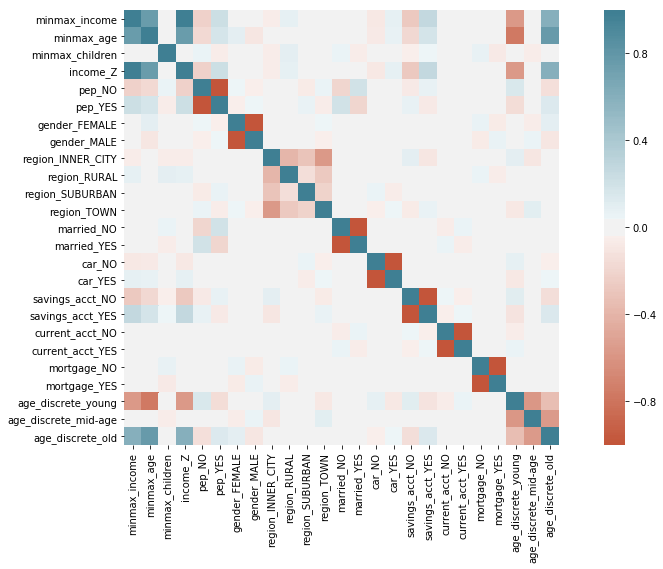

In [138]:
plt.figure(figsize=(16,8))
ax_corr = sns.heatmap(
    dummy_corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

### Results Discussion 

* **Comparison of Corr Methods**
 * **Method1** used .corr(method="pearson"). This provides values for correlations between all attribute pairs in the standardized new dummy dataset. For strong correlations we can look at pairings with + or - 0.7 values in the matrix.
 * **Method2** uses a heatmap or corrplot to do essentially the same thing but represent it visually. This helps with identifying highly correlated attributes among the high number of attributes in the dataset. On my specific visualization I did not include the numbers so it would look cleaner. 
* **Interpretation of Results**:
 * NOTES: Because the dataset includes the redundant two income columns, all attribute correlations with either income variable are the same. If this was going to be used for any sort of model only 1 should be included. Also the discretized Ages are naturally going to be correlated as expected with the min-max age column. Young age negatively correlated and old age positively correlated. Unsurprisingly Age and Income are highly correlated. Older you get probably more income you earn.

## Problem 8

8. Using Matplotlib library and/or ploting capabilties of Pandas, create a scatter plot of the (non-normalized) Income attribute relative to Age. Be sure that your plot contains appropriate labels for the axes. Do these variables seem correlated?


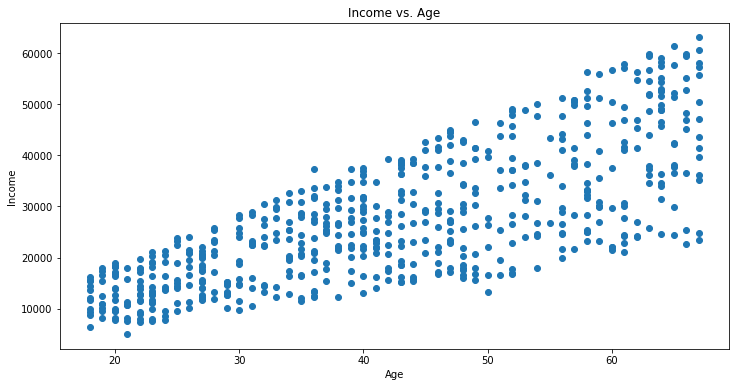

In [143]:
plt.figure(figsize=(12,6))
plt.scatter(df.age, df.income)
plt.title("Income vs. Age")
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

* Yes, these variables are highly postively correlated. From the previous problem, r is approximately 0.75.

## Problem 9

9. Create histograms for (non-normalized) Income (using 9 bins) and Age (using 15 bins).


### Income Histogram (9 bins)

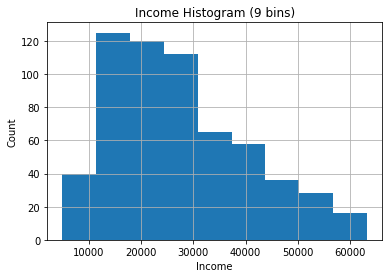

In [147]:
income_hist = df['income'].hist(bins=9)
plt.title("Income Histogram (9 bins)")
plt.xlabel("Income")
plt.ylabel("Count")
income_hist

### Age Histogram (15 bins)

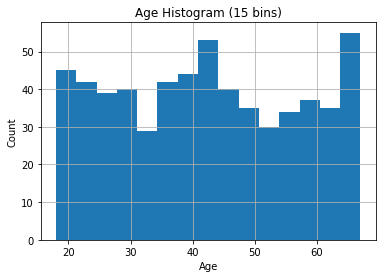

In [148]:
age_hist = df['age'].hist(bins=15)
plt.title("Age Histogram (15 bins)")
plt.xlabel("Age")
plt.ylabel("Count")
age_hist

## Problem 10

10. Using a bargraph, plot the distribution of the values of the region attribute.


INNER_CITY    269
TOWN          173
RURAL          96
SUBURBAN       62
Name: region, dtype: int64

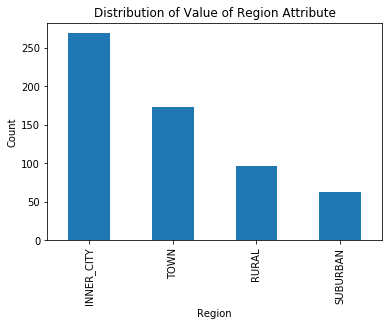

In [150]:
#Region Attribute
plt.title("Distribution of Value of Region Attribute")
plt.xlabel("Region")
plt.ylabel("Count")
df['region'].value_counts().plot(kind='bar')
df['region'].value_counts()

## Problem 11

11. Perform a cross-tabulation of the region attribute with the pep attribute. This requires the aggregation of the occurrences of each pep value (yes or no) separately for each value of the region attribute. Show the results as a 4 by 2 (region x pep) table with entries representing the counts. [Hint: you can either use Numpy or use aggregations functions in Pandas such as groupby() and  cross-tab().] Then, either using Matplotlib directly or the plot() function in Pandas create a bar chart graph to visualize of the relationships between these sets of variables. [Hint: This example of creating simple bar charts using Matplotlib may be useful.]

### Crosstab

In [153]:
#Crosstab
pd.crosstab(df.region,df.pep)

pep,NO,YES
region,,
INNER_CITY,146,123
RURAL,50,46
SUBURBAN,28,34
TOWN,102,71


In [154]:
#Clean it up (manually):
# intialise data of lists. 
crosstab_data = {'Region':['Inner_City', 'Rural', 'Suburban', 'Town'], 
                 'Pep_NO':[146, 50, 28, 102],
                 'Pep_YES':[123, 46, 34, 71]} 
  
# Create DataFrame 
crosstab_data_df = pd.DataFrame(crosstab_data) 
  
# Print the output. 
crosstab_data_df

,Region,Pep_NO,Pep_YES
0,Inner_City,146,123
1,Rural,50,46
2,Suburban,28,34
3,Town,102,71


### Visualization of Crosstab

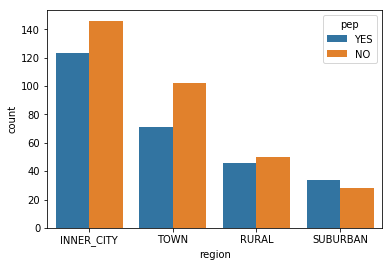

In [151]:
#Region
region_comp = sns.countplot(x="region", hue="pep", data=df)

* Same plot as in the other question.